# CNN
CNN model on Digit Dataset

Read the below link again 
https://www.kaggle.com/chapagain/digit-recognizer-beginner-s-guide-mlp-cnn-keras
https://keras.io/models/model/
read more about fit and evaluate function

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.datasets import mnist

# for Convolutional Neural Network (CNN) model
from keras.models import Sequential
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense

from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


# Loading Dataset

In [2]:
train = pd.read_csv('/home/oliver/Documents/DL_Kaggle/Digit/train.csv')
print (train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('/home/oliver/Documents/DL_Kaggle/Digit/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Separating the labels from training dataset and making it as x_label
y_train = train['label']
x_train = train.drop(labels=['label'],axis=1)
x_test = test

# Frequency of the digits in the dataset
#print(y_train.value_counts())

In [5]:
# Set values of the Data
x_train = x_train.values.astype('float32') # pixel values of all images in train set
y_train = y_train.values.astype('int32') # labels of all images
x_test = test.values.astype('float32') # pixel values of all images in test set

In [6]:
# fix random seed for reproducibility
random_seed = 7
np.random.seed(random_seed)

# Normalizing the Input

In [7]:
# normalize inputs from 0-255 to 0-1 as pixel values are gray scale between 0 and 255
x_train = x_train / 255
x_test = x_test / 255

# Converting Output into one hot code
A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1 and as this is a multi classification problem so we can convert the output class values into one-hot format which is simply a binary matrix, i.e.

value 0 will be converted to one-hot format as [1, 0, 0, 0, 0, 0, 0, 0, 0]

value 1 will be converted to one-hot format as [0, 1, 0, 0, 0, 0, 0, 0, 0] etc

In [8]:
# one hot encode outputs'
Y_train = np_utils.to_categorical(y_train)
num_classes = Y_train.shape[1]

# Splitting Dataset Into Training and Validation
We split the train dataset into two parts in 9:1 ratio. 90% will be the actual training set and the remaining 10% will be the validation/testing set.

In [9]:
# Split in Training set and Validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, Y_train, test_size = 0.10, random_state=random_seed)
print (x_train.shape, y_train.shape, x_val.shape, y_val.shape)
num_pixels = x_train.shape[1]

(37800, 784) (37800, 10) (4200, 784) (4200, 10)


In [10]:
# converting one-hot format of digits to normal values/labels
print(y_val)
Y_val = np.argmax(y_val, 1) # reverse of to_categorical
print (Y_val)
# Note that: small y_val contains values in one-hot format and capital Y_val contains normal digit values

[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]
[1 1 4 ..., 0 2 2]


In [11]:
# Reshaping the Image for CNN 2-dimesional input in [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')
x_val = x_val.reshape(x_val.shape[0], 1, 28, 28).astype('float32')

print (num_pixels, x_train.shape, x_test.shape, x_val.shape)

784 (37800, 1, 28, 28) (28000, 1, 28, 28) (4200, 1, 28, 28)


# CNN Model

In [12]:
# baseline model for CNN
def baseline_model():
    # create model    
    model = Sequential()    
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))    
    model.add(Dropout(0.2))
    model.add(Flatten())    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    
    return model

# Training the model

In [13]:
model = baseline_model()
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=200, verbose=1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 43s 1ms/step - loss: 0.3030 - acc: 0.9108 - val_loss: 0.1070 - val_acc: 0.9719
Epoch 2/10
37800/37800 [==============================] - 54s 1ms/step - loss: 0.0912 - acc: 0.9728 - val_loss: 0.0684 - val_acc: 0.9836
Epoch 3/10
37800/37800 [==============================] - 53s 1ms/step - loss: 0.0613 - acc: 0.9816 - val_loss: 0.0598 - val_acc: 0.9836
Epoch 4/10
37800/37800 [==============================] - 51s 1ms/step - loss: 0.0477 - acc: 0.9849 - val_loss: 0.0546 - val_acc: 0.9840
Epoch 5/10
37800/37800 [==============================] - 48s 1ms/step - loss: 0.0375 - acc: 0.9888 - val_loss: 0.0543 - val_acc: 0.9852
Epoch 6/10
37800/37800 [==============================] - 47s 1ms/step - loss: 0.0324 - acc: 0.9894 - val_loss: 0.0506 - val_acc: 0.9864
Epoch 7/10
37800/37800 [==============================] - 48s 1ms/step - loss: 0.0257 - acc: 0.9921 - val_loss: 0.0496 - val_acc:

In [14]:
scores = model.evaluate(x_val, y_val, verbose=0)
print (scores)
print ('Score: {}'.format(scores[0]))
print ('Accuracy: {}'.format(scores[1]))

[0.050915255796031227, 0.98619047619047617]
Score: 0.05091525579603123
Accuracy: 0.9861904761904762


# Confusion Matrix for Validation dataset

In [15]:
predict_class = model.predict_classes(x_val)

In [16]:
import itertools

def plot_confusion_matrix(cm, labels,normalize):
    '''
    Plot confusion matrix of the specified accuracies and labels
    '''
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    
    # Draw ticks
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    # Normalize
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

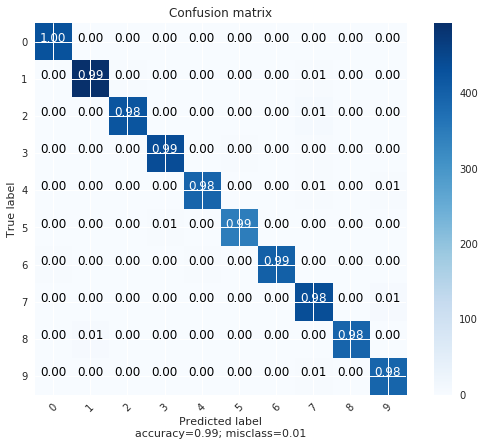

In [17]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm = confusion_matrix(Y_val,predict_class)
plot_confusion_matrix(cm,class_names,normalize =True)

# Submission to Kaggle
With only one layer of Convulational layer got the accuracy of 98.5% when submitted on kaggle.

In [18]:
prediction = pd.DataFrame()
imageid = []
for i in range(len(x_test)):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid 
prediction["Label"] = model.predict_classes(x_test, verbose=0)
print(prediction[:2])
prediction.to_csv("prediction_cnn.csv", index=False)

   ImageId  Label
0        1      2
1        2      0
